<a href="https://colab.research.google.com/github/pranavvb03/DataHack_24/blob/main/DataHack.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [61]:
train = pd.read_csv('/content/training_set_features.csv',index_col=['respondent_id'])
test = pd.read_csv('/content/test_set_features.csv',index_col=['respondent_id'])
labels = pd.read_csv('/content/training_set_labels.csv',index_col=['respondent_id'])
submission = pd.read_csv('/content/submission_format.csv')

In [65]:
train_full = train.join(labels)

In [ ]:
train_full

,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_xyz,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,xyz_vaccine,seasonal_vaccine
respondent_id,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,...,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,Own,Not in Labor Force,qufhixun,Non-MSA,0.0,0.0,NaN,NaN,0,0
26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,Rent,Employed,lzgpxyit,"MSA, Principle City",1.0,0.0,fcxhlnwr,cmhcxjea,0,0
26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,...,Own,NaN,lzgpxyit,"MSA, Not Principle City",0.0,0.0,NaN,NaN,0,1


In [ ]:
def vaccination_rate_plot(col, target, data, ax=None):
    """Stacked bar chart of vaccination rate for `target` against
    `col`.

    Args:
        col (string): column name of feature variable
        target (string): column name of target variable
        data (pandas DataFrame): dataframe that contains columns
            `col` and `target`
        ax (matplotlib axes object, optional): matplotlib axes
            object to attach plot to
    """
    counts = (train_full[[target, col]]
                  .groupby([target, col])
                  .size()
                  .unstack(target)
             )
    group_counts = counts.sum(axis='columns')
    props = counts.div(group_counts, axis='index')

    props.plot(kind="barh", stacked=True, ax=ax)
    ax.invert_yaxis()
    ax.legend().remove()

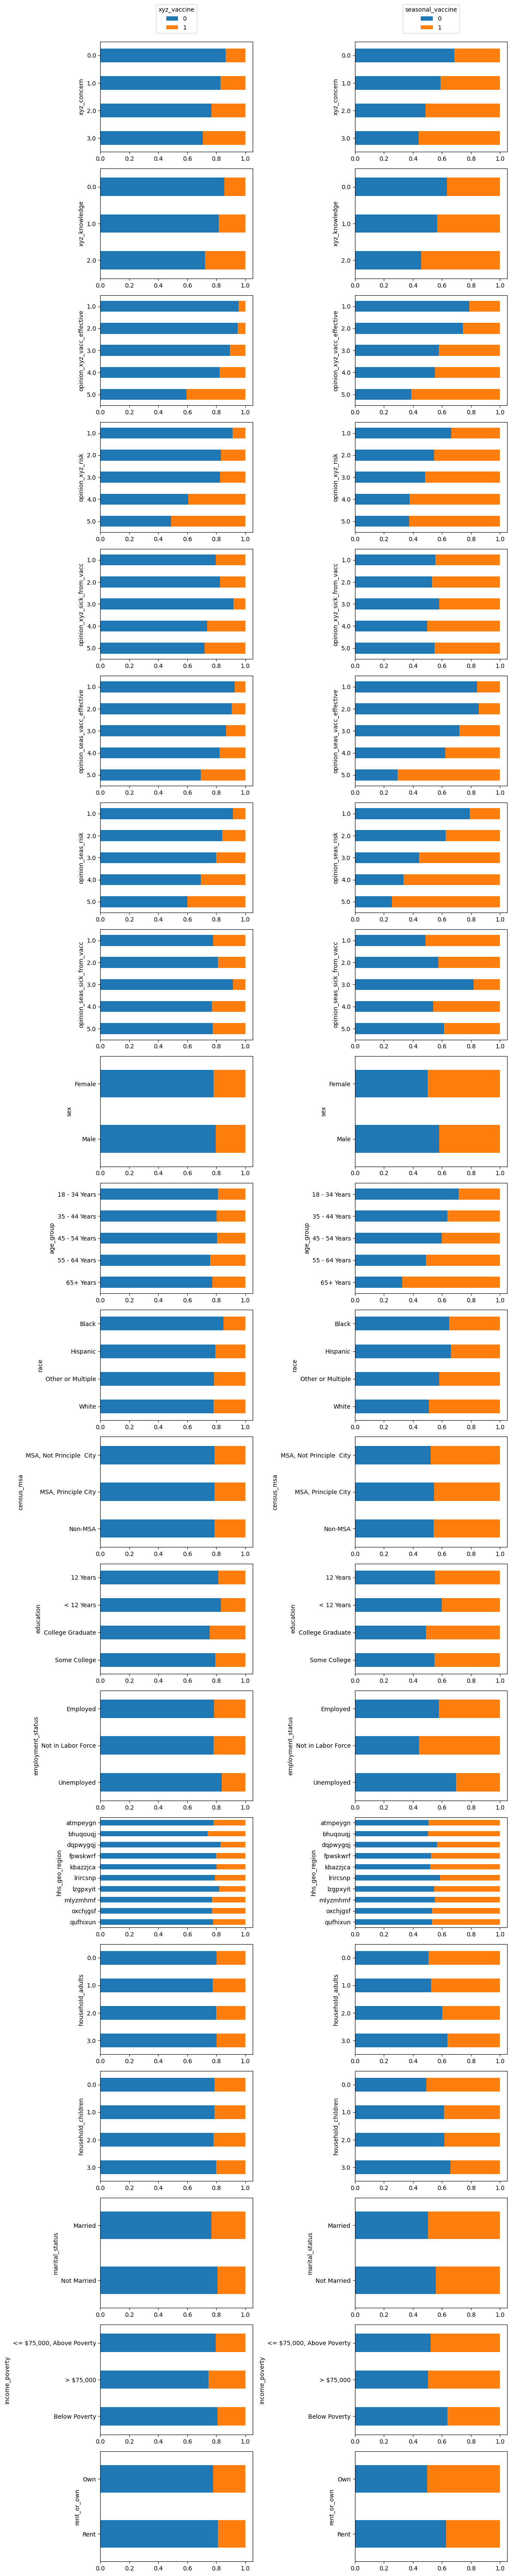

In [ ]:
cols_to_plot = [
    'xyz_concern',
    'xyz_knowledge',
    'opinion_xyz_vacc_effective',
    'opinion_xyz_risk',
    'opinion_xyz_sick_from_vacc',
    'opinion_seas_vacc_effective',
    'opinion_seas_risk',
    'opinion_seas_sick_from_vacc',
    'sex',
    'age_group',
    'race',
    'census_msa',
    'education',
    'employment_status',
    'hhs_geo_region',
    'household_adults',
    'household_children',
    'marital_status',
    'income_poverty',
    'rent_or_own'
]

fig, ax = plt.subplots(
    len(cols_to_plot), 2, figsize=(12,len(cols_to_plot)*3)
)
for idx, col in enumerate(cols_to_plot):
    vaccination_rate_plot(
        col, 'xyz_vaccine', train_full, ax=ax[idx, 0]
    )
    vaccination_rate_plot(
        col, 'seasonal_vaccine', train_full, ax=ax[idx, 1]
    )

ax[0, 0].legend(
    loc='lower center', bbox_to_anchor=(0.5, 1.05), title='xyz_vaccine'
)
ax[0, 1].legend(
    loc='lower center', bbox_to_anchor=(0.5, 1.05), title='seasonal_vaccine'
)
fig.tight_layout()


In [ ]:
# View Proportion of Missing Data (Descending)
train_full.isna().sum().sort_values(ascending=False)/len(train_full)

employment_occupation          0.504362
employment_industry            0.499120
health_insurance               0.459580
income_poverty                 0.165612
doctor_recc_xyz                0.080878
doctor_recc_seasonal           0.080878
rent_or_own                    0.076459
employment_status              0.054780
marital_status                 0.052720
education                      0.052683
chronic_med_condition          0.036358
child_under_6_months           0.030704
health_worker                  0.030104
opinion_seas_sick_from_vacc    0.020107
opinion_seas_risk              0.019246
opinion_seas_vacc_effective    0.017299
opinion_xyz_sick_from_vacc     0.014790
opinion_xyz_vacc_effective     0.014640
opinion_xyz_risk               0.014528
household_adults               0.009323
household_children             0.009323
behavioral_avoidance           0.007788
behavioral_touch_face          0.004793
xyz_knowledge                  0.004343
xyz_concern                    0.003445


In [58]:
def data_encoding(data):
    # Replace Binary Categories with 0 and 1
    data['sex'] = data['sex'].replace({'Male': 0, 'Female': 1})
    data['marital_status'] = data['marital_status'].replace({'Not Married': 0, 'Married': 1})
    data['rent_or_own'] = data['rent_or_own'].replace({'Rent': 0, 'Own': 1})

    # Replace Rank Order Categories starting with 0 to number of categories resepctively
    data['age_group'] = data['age_group'].replace({'18 - 34 Years': 0,
                                                               '35 - 44 Years': 1,
                                                               '45 - 54 Years': 2,
                                                               '55 - 64 Years': 3,
                                                               '65+ Years': 4
    })

    data['education'] = data['education'].replace({'< 12 Years': 0,
                                                               '12 Years': 1,
                                                               'Some College': 2,
                                                               'College Graduate': 3
    })

    data['income_poverty'] = data['income_poverty'].replace({'Below Poverty': 0,
                                                                         '<= $75,000, Above Poverty': 1,
                                                                         '> $75,000': 2
    })

    data['employment_status'] = data['employment_status'].replace({'Not in Labor Force': 0,
                                                                               'Unemployed': 1,
                                                                               'Employed': 2
    })

    data['census_msa'] = data['census_msa'].replace({'Non-MSA': 0,
                                                                 'MSA, Not Principle  City': 1,
                                                                 'MSA, Principle City': 2
    })

    # One Hot Encode categories that do not have rank order
    #from sklearn.preprocessing import OneHotEncoder

    # Define the columns to be one hot encoded
    columns_to_encode = ['race', 'hhs_geo_region', 'employment_industry', 'employment_occupation']

    # Create an instance of the OneHotEncoder
    encoder = OneHotEncoder(sparse=False)

    # Fit and transform the selected columns
    encoded_columns = encoder.fit_transform(data[columns_to_encode])

    # Create a dataframe with the encoded columns
    encoded_df = pd.DataFrame(encoded_columns, columns=encoder.get_feature_names_out(columns_to_encode))

    # Set index back to DataFrame
    encoded_df.index = data.index

    # Concatenate the encoded dataframe with the original dataframe
    data_encoded = pd.concat([data, encoded_df], axis=1)

    # Drop the original columns that were encoded
    data_encoded.drop(columns_to_encode, axis=1, inplace=True)

    return data_encoded

In [66]:
train_data_encoded = data_encoding(train_full)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [67]:
X = train_data_encoded.drop(columns=['xyz_vaccine','seasonal_vaccine'], axis=1)
y = train_data_encoded[['xyz_vaccine']]

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25,
                                                    shuffle=True,
                                                    stratify=y,
                                                    random_state=1)

In [68]:
xgb_xyz = xgb.XGBClassifier(colsample_bytree=0.6,
                             learning_rate=0.01,
                             max_depth=5,
                             n_estimators=1000,
                             subsample=0.3)

# Fit the model on the entire training set
xgb_xyz.fit(X_train, y_train)

# Predict probabilities for the TRAIN set
y_pred_proba_train_xyz = xgb_xyz.predict_proba(X_train)

# Predict probabilities for the TEST set
y_pred_proba_test_xyz = xgb_xyz.predict_proba(X_test)

# Predict scores for TEST set
y_preds_test_xyz = xgb_xyz.predict(X_test)

In [69]:
roc_auc_train_xgb_xyz = roc_auc_score(y_train, y_pred_proba_train_xyz[:,1])
roc_auc_test_xgb_xyz = roc_auc_score(y_test, y_pred_proba_test_xyz[:,1])

# Print ROC AUC scores
print(f'AUROC XGB xyz Train: {roc_auc_train_xgb_xyz}'
      f'\nAUROC XGB xyz Test: {roc_auc_test_xgb_xyz}'
)

AUROC XGB xyz Train: 0.9029366625634799
AUROC XGB xyz Test: 0.8790677302092909


In [70]:
X_se = train_data_encoded.drop(columns=['xyz_vaccine', 'seasonal_vaccine'], axis=1)
y_se = train_data_encoded[['seasonal_vaccine']]

X_train_se, X_test_se, y_train_se, y_test_se = train_test_split(X_se, y_se,
                                                    test_size=0.25,
                                                    shuffle=True,
                                                    stratify=y,
                                                    random_state=1)

In [71]:
xgb_se = xgb.XGBClassifier(colsample_bytree=0.6,
                           learning_rate=0.01,
                           max_depth=4,
                           n_estimators=1000,
                           subsample=0.3)

# Fit the model on the entire training set
xgb_se.fit(X_train_se, y_train_se)

# Predict probabilities for the TRAIN set
y_pred_proba_train_se = xgb_se.predict_proba(X_train_se)

# Predict probabilities for the TEST set
y_pred_proba_test_se = xgb_se.predict_proba(X_test_se)

# Predict scores for TEST set
y_preds_test_se = xgb_se.predict(X_test_se)

In [72]:
roc_auc_train_xgb_se = roc_auc_score(y_train_se, y_pred_proba_train_se[:,1])
roc_auc_test_xgb_se = roc_auc_score(y_test_se, y_pred_proba_test_se[:,1])

# Print ROC AUC scores
print(f'AUROC XGB Seasonal Train: {roc_auc_train_xgb_se}'
      f'\nAUROC XGB Seasonal Test: {roc_auc_test_xgb_se}'
)

AUROC XGB Seasonal Train: 0.8771621256214834
AUROC XGB Seasonal Test: 0.8729085914609188


In [73]:
test_data = test
test_data_encoded = data_encoding(test_data)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [74]:
xgb_xyz.fit(X, y)

# Fit on Entire Training Dataset (Seasonal)
xgb_se.fit(X_se, y_se)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1000, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [76]:
y_test_data_pred_proba_xgb_xyz = xgb_xyz.predict_proba(test_data_encoded)
print(y_test_data_pred_proba_xgb_xyz[:,1])
y_test_data_pred_proba_xgb_se = xgb_se.predict_proba(test_data_encoded)
print(y_test_data_pred_proba_xgb_se[:,1])

[0.11669583 0.0352162  0.20846818 ... 0.14522323 0.02196062 0.5745106 ]
[0.2717708  0.03811385 0.7339759  ... 0.20909777 0.29879227 0.6721422 ]


In [77]:
submission['xyz_vaccine'] = y_test_data_pred_proba_xgb_xyz[:,1]
submission['seasonal_vaccine'] = y_test_data_pred_proba_xgb_se[:,1]

submission.to_csv('final.csv', index=False)